In [28]:
# Data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('/home/yash-jadhav/Jadhav/DataForge/archive/train.csv')

# Display the first 5 rows
print(df.head())

                                              tweets       class
0  Be aware  dirty step to get money  #staylight ...  figurative
1  #sarcasm for #people who don't understand #diy...  figurative
2  @IminworkJeremy @medsingle #DailyMail readers ...  figurative
3  @wilw Why do I get the feeling you like games?...  figurative
4  -@TeacherArthurG @rweingarten You probably jus...  figurative


In [30]:
df['class'].unique()

array(['figurative', 'irony', 'regular', 'sarcasm'], dtype=object)

In [31]:
df.shape

(81408, 2)

In [32]:
num_nan = df['class'].isna().sum()
print(f"Number of rows with NaN label: {num_nan}")

Number of rows with NaN label: 0


In [33]:
# Replace class name as either 'Sarcasm' or 'Genuine'
def map_label(label):
    if label in ['sarcasm', 'irony']:
        return 'Sarcastic'
    elif label in ['regular', 'figurative']:
        return 'Genuine'
    else:
        return np.nan

df['label_binary'] = df['class'].apply(map_label)
df = df.dropna(subset=['label_binary'])  # Remove rows with no label

In [34]:
df.head()

,tweets,class,label_binary
0,Be aware dirty step to get money #staylight ...,figurative,Genuine
1,#sarcasm for #people who don't understand #diy...,figurative,Genuine
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative,Genuine
3,@wilw Why do I get the feeling you like games?...,figurative,Genuine
4,-@TeacherArthurG @rweingarten You probably jus...,figurative,Genuine


In [35]:
df.shape

(81408, 3)

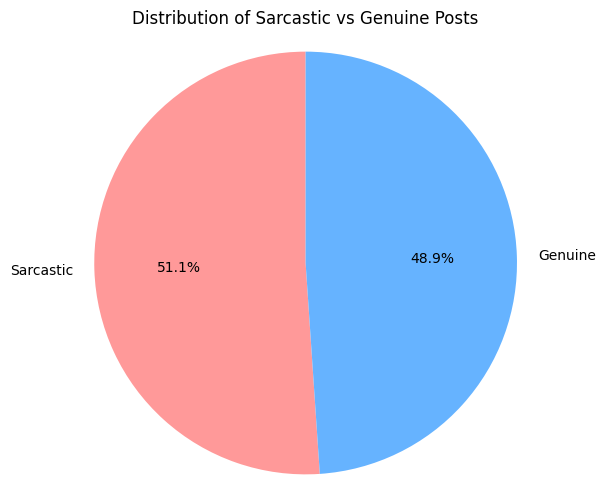

In [36]:
import matplotlib.pyplot as plt

# Count the label distribution
label_counts = df['label_binary'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=['#FF9999','#66B3FF'])
plt.title("Distribution of Sarcastic vs Genuine Posts")
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()


In [37]:
df[df['label_binary'] == 'Sarcastic'].head()

,tweets,class,label_binary
21238,"Fav moment in Sepp Blatter vid (0:20): ""We hav...",irony,Sarcastic
21239,Just found this while walking my human.... #ir...,irony,Sarcastic
21240,'Disrespected the wife of Prophet' - pseudo li...,irony,Sarcastic
21241,Do you know that super yeay satisfying feeling...,irony,Sarcastic
21242,If you're going to call someone ignorant and s...,irony,Sarcastic


In [42]:
df.loc[21238, 'tweets']

'Fav moment in Sepp Blatter vid (0:20): "We have to clean here first. This has nothing to do with football." https://t.co/4dhWOK9x2e #irony'

In [44]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 12.0 MB/s eta 0:00:00


In [50]:
import nltk
print(nltk.data.find('tokenizers/punkt'))

/home/yash-jadhav/nltk_data/tokenizers/punkt


In [51]:
import nltk
nltk.data.path.append('/home/yash-jadhav/nltk_data/tokenizers/punkt')
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/yash-
[nltk_data]     jadhav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [53]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /home/yash-
[nltk_data]     jadhav/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [55]:
#Preprocessing
import re
import emoji
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Ensure NLTK resources are downloaded (run once)
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize the Lemmatizer and Stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Preprocess tweet function
def preprocess_tweet(tweet):
    # 1. Convert to lowercase
    tweet = tweet.lower()
    
    # 2. Remove URLs
    tweet = re.sub(r"http\S+|www\S+|https\S+", "", tweet)
    
    # 3. Remove mentions (@user)
    tweet = re.sub(r"@[\w]+", "", tweet)
    
    # 4. Remove HTML tags
    tweet = re.sub(r"<.*?>", "", tweet)  # This removes HTML tags like <div>, <span>, etc.
    
    # 5. Remove special characters and punctuation (keep emojis)
    tweet = re.sub(r"[^\w\s,']", "", tweet)
    
    # 6. Convert emojis to text (optional)
    tweet = emoji.demojize(tweet)
    
    # 7. Tokenization
    words = word_tokenize(tweet)
    
    # 8. Remove stopwords
    words = [word for word in words if word not in stop_words]
    
    # 9. Lemmatization (optional)
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join words back into a single string
    return " ".join(words).strip()

# Apply preprocessing to the 'tweets' column
df['processed_tweets'] = df['tweets'].apply(preprocess_tweet)

# Preview the cleaned data
print(df[['tweets', 'processed_tweets']].head())


[nltk_data] Downloading package punkt to /home/yash-
[nltk_data]     jadhav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/yash-
[nltk_data]     jadhav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/yash-
[nltk_data]     jadhav/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                              tweets  \
0  Be aware  dirty step to get money  #staylight ...   
1  #sarcasm for #people who don't understand #diy...   
2  @IminworkJeremy @medsingle #DailyMail readers ...   
3  @wilw Why do I get the feeling you like games?...   
4  -@TeacherArthurG @rweingarten You probably jus...   

                                    processed_tweets  
0  aware dirty step get money staylight staywhite...  
1        sarcasm people n't understand diy artattack  
2  dailymail reader sensible always shocker sarca...  
3                      get feeling like game sarcasm  
4                     probably missed text sarcastic  


In [60]:
df.loc[4, 'processed_tweets']

'probably missed text sarcastic'

In [61]:
df.head()

,tweets,class,label_binary,processed_tweets
0,Be aware dirty step to get money #staylight ...,figurative,Genuine,aware dirty step get money staylight staywhite...
1,#sarcasm for #people who don't understand #diy...,figurative,Genuine,sarcasm people n't understand diy artattack
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative,Genuine,dailymail reader sensible always shocker sarca...
3,@wilw Why do I get the feeling you like games?...,figurative,Genuine,get feeling like game sarcasm
4,-@TeacherArthurG @rweingarten You probably jus...,figurative,Genuine,probably missed text sarcastic


In [62]:
# Drop the 'tweets' and 'class' columns
df = df.drop(columns=['tweets', 'class'])

# Display the first few rows to check the changes
df.head()

,label_binary,processed_tweets
0,Genuine,aware dirty step get money staylight staywhite...
1,Genuine,sarcasm people n't understand diy artattack
2,Genuine,dailymail reader sensible always shocker sarca...
3,Genuine,get feeling like game sarcasm
4,Genuine,probably missed text sarcastic


In [64]:
# Convert 'Sarcasm' to 1 and 'Genuine' to 0 in the 'binary_class' column
df['label_binary'] = df['label_binary'].replace({'Sarcasm': 1, 'Genuine': 0})

# Display the first few rows to check the changes
df.head()

,label_binary,processed_tweets
0,0,aware dirty step get money staylight staywhite...
1,0,sarcasm people n't understand diy artattack
2,0,dailymail reader sensible always shocker sarca...
3,0,get feeling like game sarcasm
4,0,probably missed text sarcastic


In [65]:
!pip install transformers tensorflow datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 5.1 MB/s eta 0:00:004.9 MB/s eta 0:00:01
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2


In [69]:
!pip install tf-keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 4.1 MB/s eta 0:00:00 MB/s eta 0:00:01


In [70]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from datasets import Dataset

In [71]:
# Load the tokenizer and BERT model for sequence classification
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)  # 2 labels: Sarcasm or Genuine

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

2025-04-26 11:41:15.752542: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [72]:
# Function to format the data suiatble for BERT 
def preprocess_data(texts, labels):
    encodings = tokenizer(texts, truncation=True, padding=True, max_length=128)
    return {
        'input_ids': np.array(encodings['input_ids']),
        'attention_mask': np.array(encodings['attention_mask']),
        'labels': np.array(labels)
    }

In [85]:
# Apply the function to the 'processed_tweets' and 'label' columns
train_data = preprocess_data(df['processed_tweets'].tolist(), df['label_binary'].tolist())

In [86]:
import tensorflow as tf

# Create tf.data.Dataset objects
train_data = tf.data.Dataset.from_tensor_slices((
    {
        'input_ids': train_data['input_ids'],
        'attention_mask': train_data['attention_mask']
    },
    train_data['labels']
))

# Shuffle and batch the datasets
train_data = train_data.shuffle(1000).batch(16)  # You can adjust batch_size


In [87]:
from sklearn.model_selection import train_test_split

# Split train_dataset into train and validation
train_inputs, val_inputs, train_masks, val_masks, train_labels, val_labels = train_test_split(
    train_data['input_ids'],
    train_data['attention_mask'],
    train_data['labels'],
    test_size=0.2,
    random_state=42
)


TypeError: '_BatchDataset' object is not subscriptable

In [81]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[metric])


In [82]:
# Train the model
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=10  # You can adjust epochs
)


NameError: name 'test_data' is not defined